In [1]:
import numpy as np
import numpy.fft
from scipy import misc
from scipy.ndimage import convolve
from scipy.signal import convolve2d, correlate2d
import scipy.fftpack as fp

In [2]:
from skimage import img_as_float, img_as_ubyte
from skimage.io import imread, imsave, imshow

In [3]:
from scipy.ndimage import affine_transform, zoom
from skimage import color, exposure, data

In [4]:
import matplotlib.pyplot as plt

## Question 1

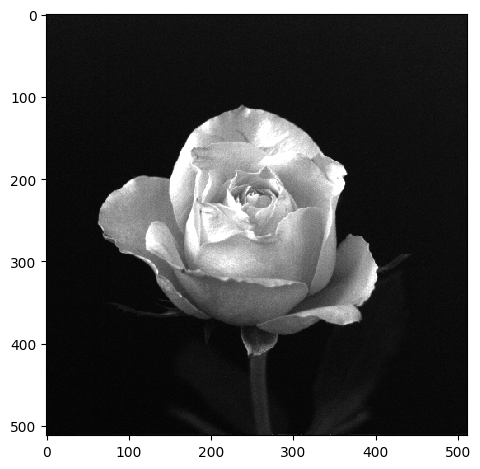

In [5]:
f_rose = img_as_float(imread("data/labD_images/rose512.tif"))
imshow(f_rose, cmap='gray')

In [6]:
F_rose = fp.fft2(f_rose)

/home/marcelln/Digital-Image-Processing/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


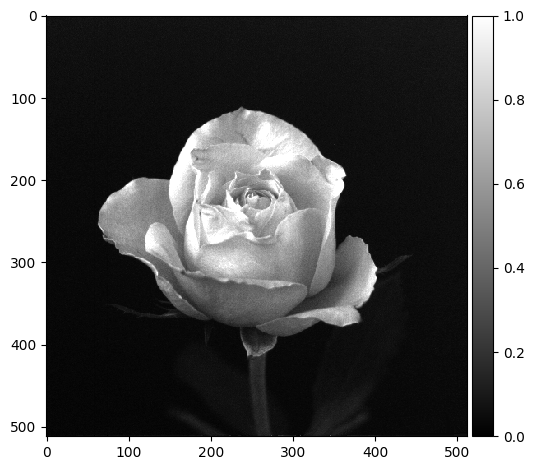

In [7]:
g_rose = fp.ifft2(F_rose).real
imshow(g_rose, cmap='gray',vmin=0,vmax=1)

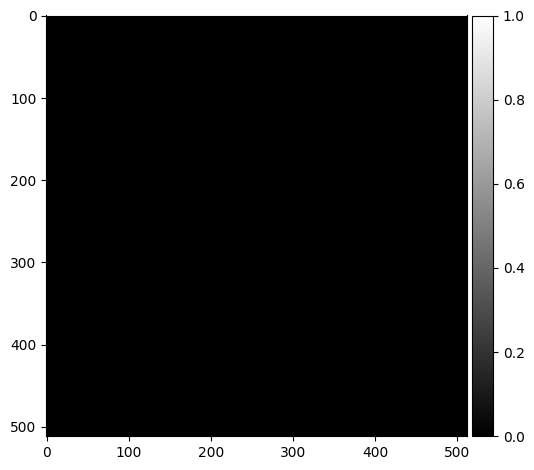

In [8]:
d_rose = f_rose-g_rose
imshow(d_rose, cmap='gray',vmin=0,vmax=1)

In [9]:
np.min(d_rose)

-8.881784197001252e-16

In [10]:
np.max(d_rose)

5.828670879282072e-16

## Question 2

In [11]:
M = 688
N = 600

f_cent = np.zeros([M,N])
for i in range(160):
    for j in range(30):
        f_cent[M//2-80+i,N//2-15+j] = 1.0

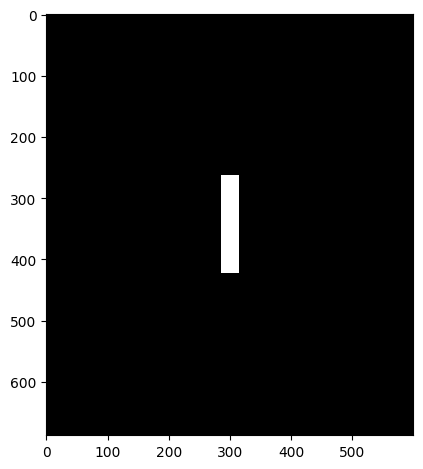

In [12]:
imshow(f_cent,cmap='gray')

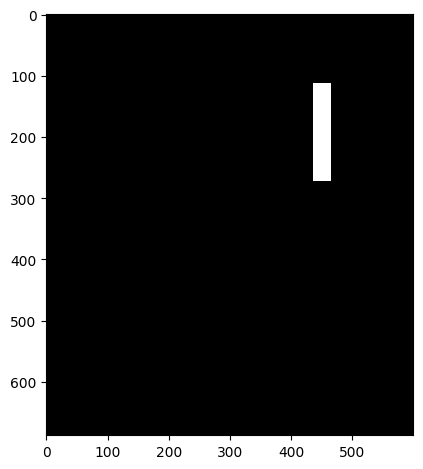

In [13]:
m_I = np.array([[1,0,150],[0,1,-150],[0,0,1]])
f_trans=affine_transform(f_cent,m_I)
f_trans = exposure.rescale_intensity(f_trans,(0,1),(0,1))
imshow(f_trans,cmap='gray')

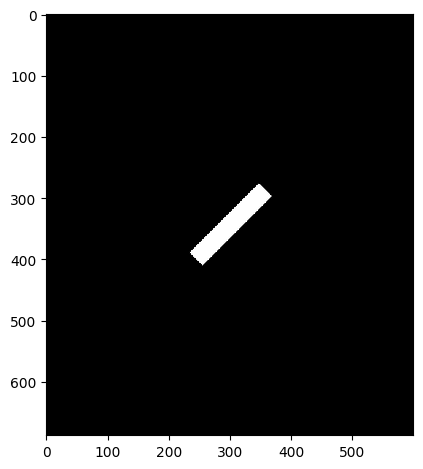

In [14]:
theta = -np.pi*(45/180)
m_R = np.array([[1,0,M/2],[0,1,N/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-
                                           np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-M/2],[0,1,-N/2],[0,0,1]])
f_rot = affine_transform(f_cent,m_R)
f_rot = exposure.rescale_intensity(f_rot,(0,1),(0,1))
imshow(f_rot,cmap='gray')

In [15]:
F_cent  = fp.fft2(f_cent) 
F_trans = fp.fft2(f_trans)
F_rot   = fp.fft2(f_rot)

In [16]:
F_cent_s  = abs(F_cent)
F_trans_s = abs(F_trans)
F_rot_s   = abs(F_rot)

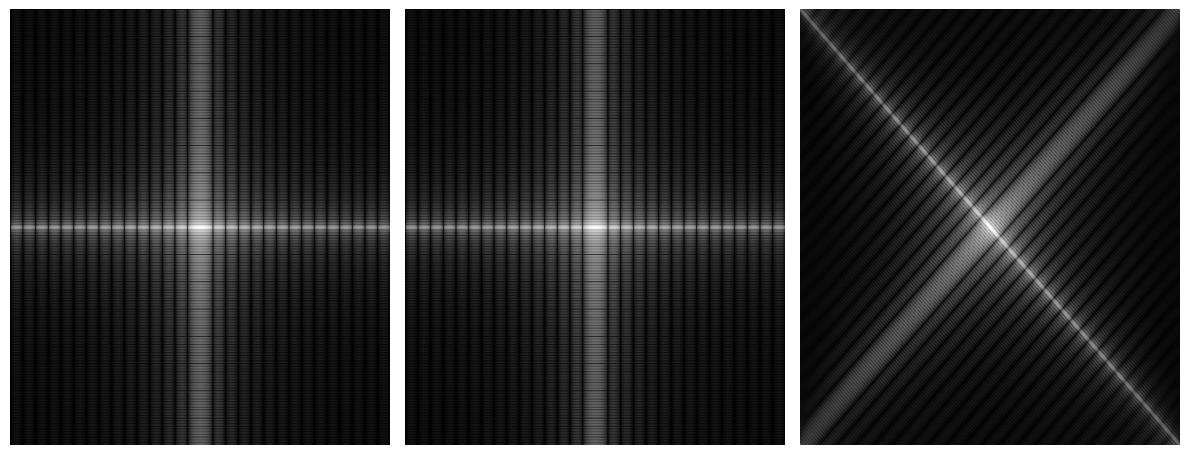

In [17]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12), sharex=True, sharey=True)
ax=axes.ravel()
ax[0].imshow(np.log10(1+fp.fftshift(F_cent_s)), cmap=plt.cm.gray)
ax[1].imshow(np.log10(1+fp.fftshift(F_trans_s)), cmap=plt.cm.gray)
ax[2].imshow(np.log10(1+fp.fftshift(F_rot_s)), cmap='gray')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [18]:
F_cent_p  = np.arctan2(F_cent.imag,F_cent.real)
F_trans_p = np.arctan2(F_trans.imag, F_trans.real)
F_rot_p   = np.arctan2(F_rot.imag,F_rot.real)

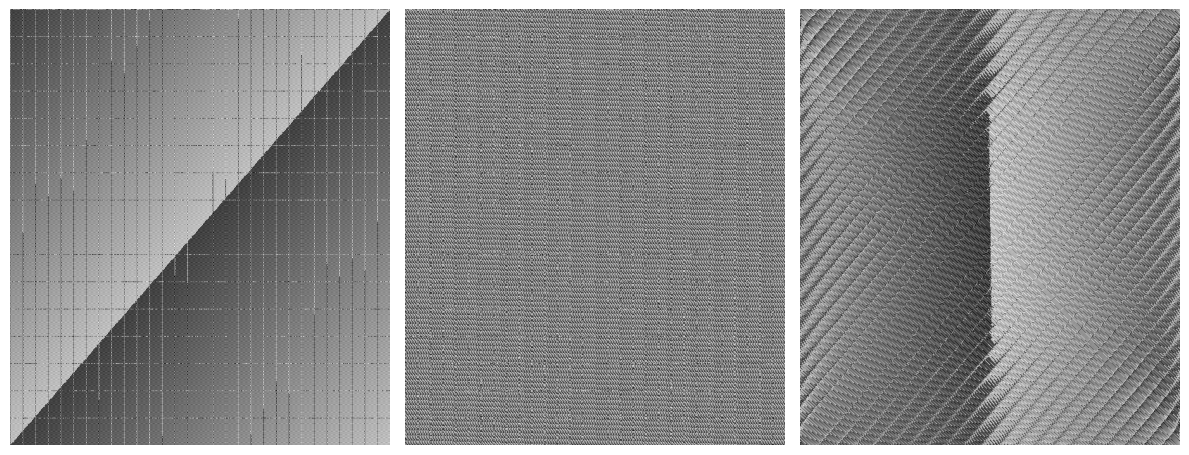

In [19]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12), sharex=True, sharey=True)
ax=axes.ravel()
ax[0].imshow(fp.fftshift(F_cent_p), cmap=plt.cm.gray)
ax[1].imshow(fp.fftshift(F_trans_p), cmap=plt.cm.gray)
ax[2].imshow(fp.fftshift(F_rot_p), cmap='gray')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

## Question 3

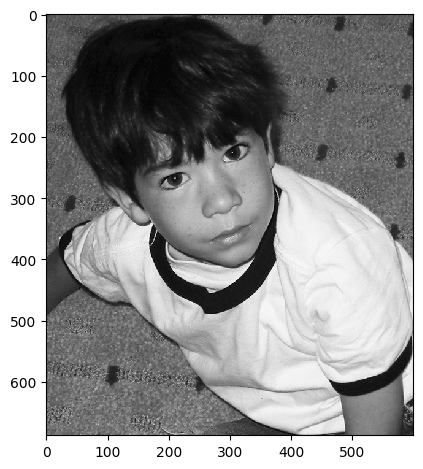

In [20]:
f_boy = img_as_float(imread("data/labD_images/boy.tif"))
imshow(f_boy, cmap='gray')

In [21]:
F_boy   = fp.fft2(f_boy)
F_boy_p = np.arctan2(F_boy.imag,F_boy.real)

In [22]:
f_boy_p = numpy.real(fp.ifft2(np.exp(F_boy_p*1j)))
f_boy_s = numpy.real(fp.ifft2(abs(F_boy)))
f_boy_p_box = numpy.real(fp.ifft2(abs(F_cent_s)*np.exp(F_boy_p*1j)))
f_boy_s_box = numpy.real(fp.ifft2(abs(F_boy)*np.exp(F_cent_p*1j)))

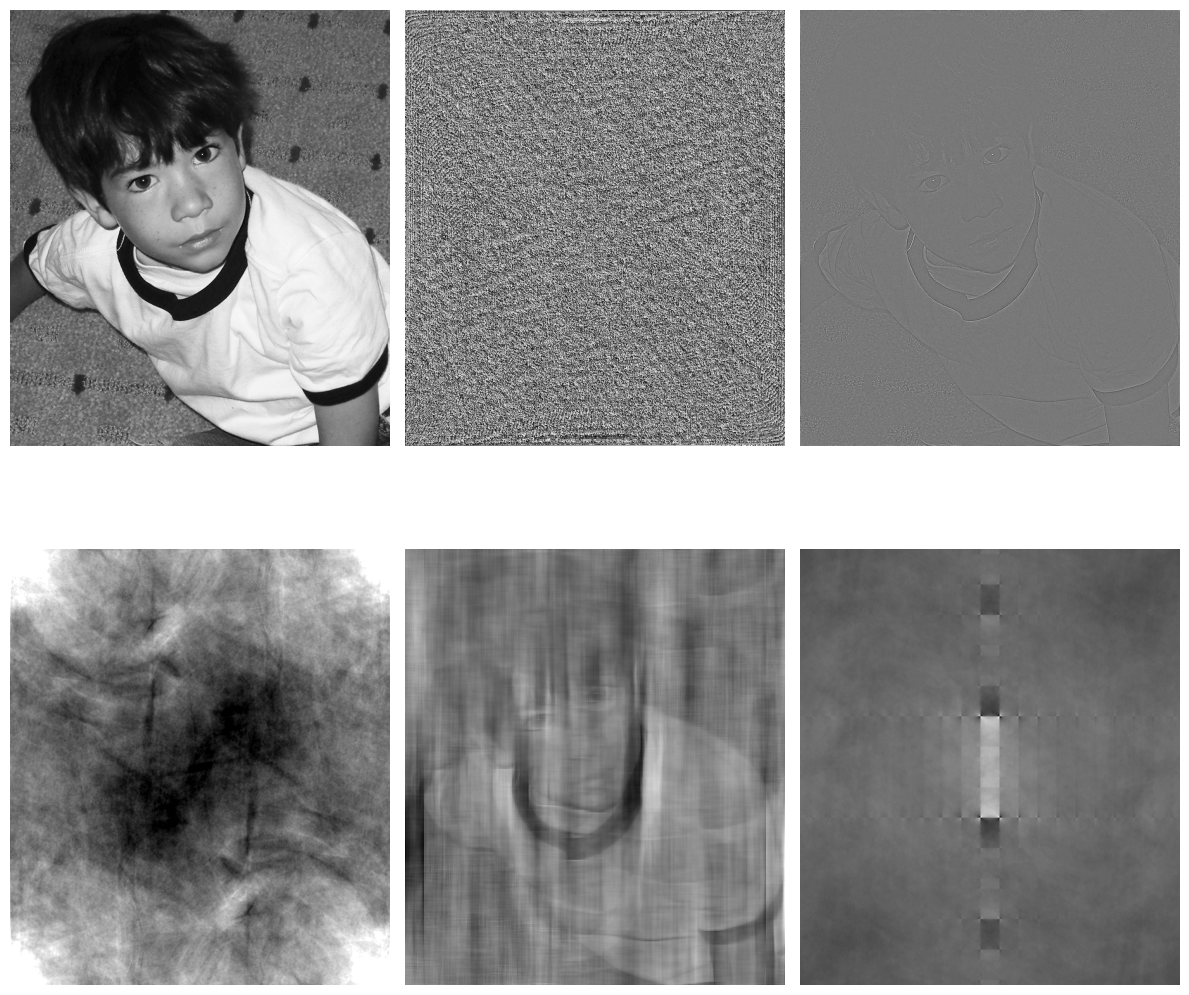

In [23]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(12,12), sharex=True, sharey=True)
ax=axes.ravel()
ax[0].imshow(f_boy, cmap=plt.cm.gray)
ax[1].imshow(F_boy_p, cmap=plt.cm.gray)
ax[2].imshow(f_boy_p, cmap=plt.cm.gray)
ax[3].imshow(f_boy_s,vmin=0,vmax=1, cmap=plt.cm.gray)
ax[4].imshow(f_boy_p_box, cmap=plt.cm.gray)
ax[5].imshow(f_boy_s_box, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

## Question 4

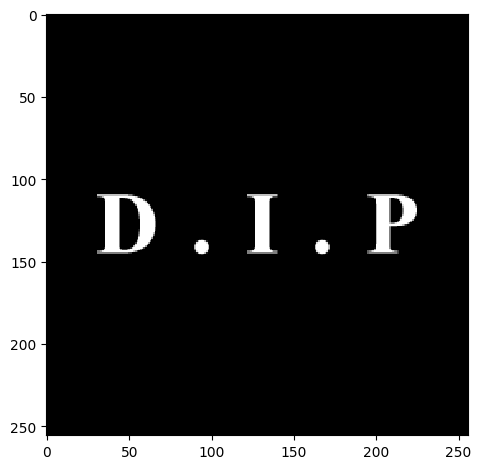

In [24]:
f_dip = img_as_float(imread("data/labD_images/DIP.tif"))
imshow(f_dip, cmap='gray')

In [25]:
M,N = f_dip.shape
g_dip = np.zeros([M,N])

for i in range(M):
    for j in range(N):
        g_dip[i,j] = f_dip[i,j]*((-1)**(i+j))
                            
G_dip = fp.fft2(g_dip)
G_dip_c = np.conj(G_dip)
g_dip = np.real(fp.ifft2(G_dip_c))

for i in range(M):
    for j in range(N):
        g_dip[i,j] = g_dip[i,j]*((-1)**(i+j))
                                                        

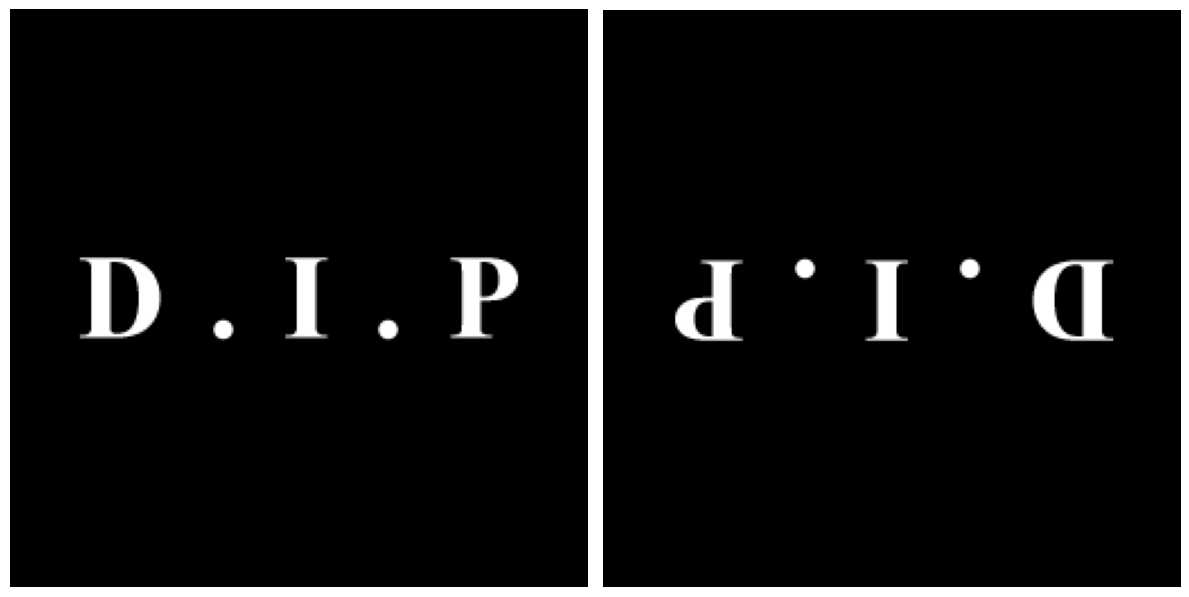

In [26]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12), sharex=True, sharey=True)
ax=axes.ravel()
ax[0].imshow(f_dip, cmap=plt.cm.gray)
ax[1].imshow(g_dip, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()